In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# importing all relevant packages

In [2]:
# downloading the CSV and giving it headers  so the code is more readable/easier to follow

filepath = r"C:\Users\Inigo\OneDrive - University of Bristol\Coding Stuff\IDS\smoking2.csv"

data = pd.read_csv(filepath, delimiter='\t', header = None)

data.columns = ["age", "FEV1", "height", "gender", "smoking status", "weight"]

In [3]:
# seperating data into smokers and non-smokers then finding means 

data_non = data[data.iloc[:, 4] == 0]
data_smok = data[data.iloc[:, 4] == 1]

non_FEV1_mean = data_non["FEV1"].mean()
smok_FEV1_mean = data_smok["FEV1"].mean()

print(f"Non-smoker mean FEV1 value = {round(non_FEV1_mean,3)}")
print(f"Smoker mean FEV1 value = {round(smok_FEV1_mean,3)}")


Non-smoker mean FEV1 value = 2.566
Smoker mean FEV1 value = 3.277


([<matplotlib.axis.XTick at 0x1cea66b3750>,
 [Text(1, 0, 'Non-smokers'), Text(2, 0, 'Smokers')])

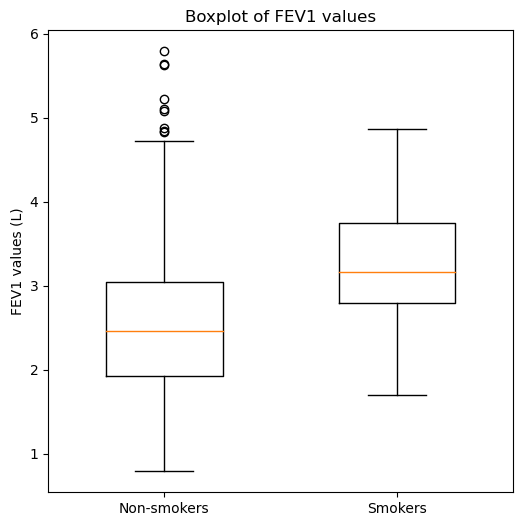

In [4]:
# creating boxplots for each data set

plt.figure(figsize = (6,6))
plt.boxplot([data_non["FEV1"], data_smok["FEV1"]], widths = 0.5)
plt.title("Boxplot of FEV1 values")
plt.ylabel("FEV1 values (L)")
plt.xticks([1,2], ["Non-smokers", "Smokers"])


In [5]:
# 'manual' t-test function, used to test if the mean of the two populations are the same

def ttest(data1, data2):
    mean_1, mean_2 = np.mean(data1), np.mean(data2)
    std_1, std_2 = np.std(data1, ddof=1), np.std(data2, ddof=1)
    n1, n2 = len(data1), len(data2)

    t_stat = (mean_1 - mean_2) / np.sqrt((std_1**2 / n1) + (std_2**2 / n2))

    dof = ((std_1**2 / n1 + std_2**2 / n2)**2) / \
     ((std_1**2 / n1)**2 / (n1 - 1) + (std_2**2 / n2)**2 / (n2 - 1)) # this is finding the degrees of freedom
    
    print(f"The degrees of freedom was {round(dof, 3)}")

    p_val = 2 * (stats.t.cdf(-abs(t_stat), dof)) # finds p val using the prevosuly calcauted t stat and degrees of freedom

    if p_val < 0.05:
        return f"p val ({round(p_val, 10)}) is less than confidence interval (0.05) so reject H0"
    else:
        return f"p val ({round(p_val, 10)}) is greater than confidence interval (0.05) so accept H0"

print(ttest(data_non["FEV1"], data_smok["FEV1"]))

# using this scipy function to double check p val

stats.ttest_ind(data_smok["FEV1"], data_non["FEV1"], equal_var=False)


The degrees of freedom was 83.273
p val (3e-10) is less than confidence interval (0.05) so reject H0


Ttest_indResult(statistic=7.149608129503808, pvalue=3.073812744876234e-10)

In [12]:
# finding correlation values

correlation_all, p_value_all = stats.pearsonr(data["FEV1"], data["age"])
correlation_non, p_value_non = stats.pearsonr(data_non["FEV1"], data_non["age"])
correlation_smok, p_value_smok = stats.pearsonr(data_smok["FEV1"], data_smok["age"])

print(f"Correlation for total population is {round(correlation_all, 3)}")
print(f"Correlation for non-smokers is {round(correlation_non, 3)}")
print(f"Correlation for smokers is {round(correlation_smok, 3)}") 

Correlation for total population is 0.756
Correlation for non-smokers is 0.782
Correlation for smokers is 0.249


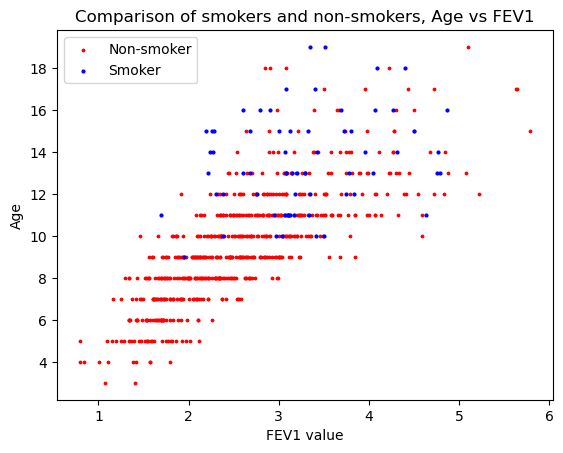

In [7]:
# plotting age vs FEV1 scatter graphs

plt.scatter(data_non["FEV1"], data_non["age"], s=3, label = "Non-smoker", color ="r")
plt.scatter(data_smok["FEV1"], data_smok["age"], s=4, label = "Smoker", color = "b")
plt.xlabel("FEV1 value")
plt.ylabel("Age")
plt.title("Comparison of smokers and non-smokers, Age vs FEV1")
plt.legend()

<function matplotlib.pyplot.show(close=None, block=None)>

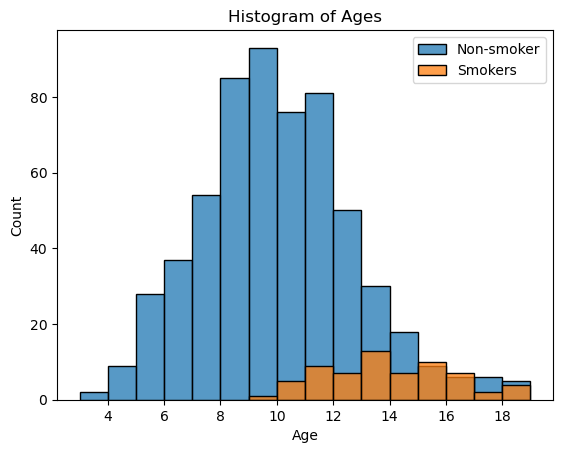

In [8]:
# using seaborn to plot histograms of the ages of non smokers and smokers

sns.histplot(data_non["age"], binwidth = 1, kde = False, label = "Non-smoker")
sns.histplot(data_smok["age"], binwidth = 1, kde = False, label = "Smokers")
plt.xlabel("Age")
plt.title("Histogram of Ages")
plt.legend()
plt.show